#1. Descripción del problema

Si, por ejemplo, queremos traducir un texto del inglés al español, para cada palabra tendremos que buscar su traducción al español (traducir no funciona así pero finjamos que si), por lo que podríamos construir un árbol de búsqueda para tener un tiempo de ejecución más controlado. Pero el motivo más importante, es para armarlo de cierta forma tal que las palabras más buscadas estén cerca de la raíz, reduciendo el tiempo que se usará en buscarlas, y he aquí el problema que este algoritmos resuelve, el de reducir la cantidad de nodos visitados en cada búsqueda que haga.

Entrada: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

Salida: Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).

#2. Código del árbol binario de búsqueda óptimo

## 2.1  Recursivo

In [8]:
def ArbolOptimoRecursivo(keys, prob, i, j, recursiones = 0,  verbose = False, visualize = False):
    if visualize == True: print("to be added")
    if j < i:
        if verbose == True: print("No hay elementos en este sub-arreglo")
        return 0, recursiones
    if j == i:
        if verbose == True: print("Solo hay 1 elemento en este sub-arreglo")
        return prob[i], recursiones

    fsum = 0
    for k in range(i, j + 1):
        fsum += prob[k]
    if verbose == True: print("Sumatoria de Probabilidades =", fsum)
     
    Min = 99999999

    for r in range(i, j + 1):
        if verbose == True: print("\nTomando como raíz al elemento", r+1, "de frecuencia", prob[r])

        recursiones+=1
        if verbose == True: print("\nResolviendo sub-arbol Izquierdo", prob[i:r])
        costIzq, recursiones = ArbolOptimoRecursivo(keys, prob, i, r - 1, recursiones, visualize, verbose)

        recursiones+=1
        if verbose == True: print("\nResolviendo sub-arbol Derecho", prob[r+1:j+1])
        costDer, recursiones = ArbolOptimoRecursivo(keys, prob, r + 1, j, recursiones, visualize, verbose)

        if verbose == True: print("\nSumando ambos costos", costIzq, "+", costDer, "=", costIzq + costDer)
        if verbose == True: print("Comparando Nuevo Costo con Costo Minimo Actual (", cost,",",Min," )")
        if (costIzq + costDer) < Min:
            if verbose == True: print("Nuevo Costo es menor")
            if verbose == True: print("Costo Minimo =", Min)
        else:
            if verbose == True: print("Costo Minimo Actual es menor, se mantiene")
        Min = min(costIzq + costDer, Min)

    return Min + fsum, recursiones

In [9]:
keys = [10, 12, 20]
freq = [34, 8, 50]
print("Entrada:")
print("K =", keys)
print("P =", prob)
cost, recursiones = ArbolOptimoRecursivo(keys, prob, 0, len(prob)-1)
print("\nSalida:")
print("Costo del Árbol Óptimo", cost)
print("Recursiones:", recursiones)

Entrada:
K = [10, 12, 20]
P = [34, 8, 50]

Salida:
Costo del Árbol Óptimo 142
Recursiones: 14


### 2.1.1 Explicación del algoritmo recursivo
El algoritmo **Árbol binario de búsqueda óptimo (recursivo)** calcula todas las posibles combinaciones de árboles y retorna el más óptimo y su costo esperado, es decir, el árbol que minimiza la cantidad esperada de nodos visitados.

Para ello recibe como entrada una secuencia ordenada de n claves $K = [k_1, k_2, ..., k_n]$ y una secuencia de probabilidades $P = [p_1, p_2, ..., p_n]$ donde $p_i$ es la probabilidad de que $k_i$ sea buscada. Luego:

1. Verifica si el sub-árbol está vacío, de ser así retorna $0$.

2. Verifica si el sub-árbol solo tiene un elemento, de ser así retorna su costo.

3. Calcula la sumatoria de probabilidades del sub-árbol.

4. Para cada nodo del sub-árbol:

    4.1. Asume que es la raíz y recursiona con el sub-árbol izquierdo y el derecho de este nodo.
    4.2. Guarda el coste menor entre el coste anterior o la suma del costo de ambos sub-árboles.

5. Retorna el costo menor guardado.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

### 2.1.2 Ejemplo
Consideremos, por ejemplo, el arreglo de claves y sus probabilidades de ser buscadas:

$K = [3, 5, 7]$

$P = [30, 60, 10]$

Primero verifica si el arbol está vacío y luego si solo tiene un elemento, este no es el caso por lo cual continúa.

Luego calcula la sumatoria de todas las probabilidades lo cual es $100$%.

Ahora entra en un ciclo desde el inicio del arbol hasta el final:

- En la 1ra iteración:
    - Se toma como raíz al  1er  elemento de frecuencia $ 30 $.
    - Se resuelve sub-arbol Izquierdo:
        - No hay elementos en este sub-arreglo, se retorna $0$.
    - Se resuelve el sub-arbol Derecho $[60, 10]$:
        - Se calcula la Sumatoria de Probabilidades la cual es $ 70 $.
        - Ahora entra en un ciclo desde el inicio hasta el final del sub-arbol:
        - En la 1ra iteración:
            - Se toma como raíz al  2do  elemento de frecuencia $ 60 $.
            - Se resuelve sub-arbol Izquierdo:
                - No hay elementos en este sub-arreglo, se retorna $0$.
            - Se resuelve el sub-arbol Derecho $[10]$:
                - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único valor  = $ 10 $.
            - Se Compara la suma de ambos costos $(10)$ con el Costo Minimo Actual (    999999999999 ):
            - El nuevo Costo es menor por lo que se reemplaza.
        - En la 2da iteración:
            - Se toma como raíz al 3er elemento de frecuencia $ 10 $.
            - Se resuelve sub-arbol Izquierdo $[60]$:
                - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único va lo   r  = $ 60 $.
            - Se resuelve el sub-arbol Derecho:
                - No hay elementos en este sub-arreglo, se retorna $0$.
            - Se Compara la suma de ambos costos $( 60 )$ con el Costo Minimo Actual ( 10 ):   
            - El Costo Minimo Actual es menor por lo que se mantiene.
        - Se retorna la suma entre la Sumatoria de Probabilidades y el Valor Mínimo la  cual es $ 80 $.
    - Se Compara la suma de ambos costos $( 80 )$ con el Costo Minimo Actual $(    999999999999 )$:
    - El nuevo Costo es menor por lo que se reemplaza.
- En la 2da iteración:
    - Se toma como raíz al  2do  elemento de frecuencia $ 60 $.
    - Se resuelve sub-arbol Izquierdo $[30]$ :
        - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único valor  = $ 30 $.
    - Se resuelve el sub-arbol Derecho $[10]$ :
        - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único valor  = $ 10 $.
    - Se Compara la suma de ambos costos $( 40 )$ con el Costo Minimo Actual $( 80 )$:
    - El nuevo Costo es menor por lo que se reemplaza.
- En la 3ra iteración:
    - Se toma como raíz al  3er  elemento de frecuencia $ 10 $.
    - Se resuelve sub-arbol Izquierdo $[30, 60]$ :
        - Se calcula la Sumatoria de Probabilidades la cual es $ 90 $.
        - Ahora entra en un ciclo desde el inicio hasta el final del sub-arbol:
            - En la 1ra iteración:
                - Se toma como raíz al  1er  elemento de frecuencia $ 30 $.
                - Se resuelve sub-arbol Izquierdo:
                    - No hay elementos en este sub-arreglo, se retorna $0$.
                - Se resuelve el sub-arbol Derecho $[60]$ :
                    - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único valor  = $ 60 $.
                - Se Compara la suma de ambos costos $( 60 )$ con el Costo Minimo Actual $(999999999999)$:
                - El nuevo Costo es menor por lo que se reemplaza.
            - En la 2da iteración:
                - Se toma como raíz al  2do  elemento de frecuencia $ 60 $.
                - Se resuelve sub-arbol Izquierdo $[30]$ :
                    - Solo hay 1 elemento en este sub-arreglo por lo que se retorna el único valor  = $ 30 $.
                - Se resuelve el sub-arbol Derecho:
                    - No hay elementos en este sub-arreglo, se retorna $0$.
                - Se Compara la suma de ambos costos $(30)$ con el Costo Minimo Actual $(60)$:   
                - El nuevo Costo es menor por lo que se reemplaza.
            - Se retorna la suma entre la Sumatoria de Probabilidades y el Valor Mínimo la  cual es $ 120 $.
    - Se resuelve el sub-arbol Derecho:
        - No hay elementos en este sub-arreglo, se retorna $0$.
    - Se Compara la suma de ambos costos $( 120 )$ con el Costo Minimo Actual $( 40 )$  :
    - El Costo Minimo Actual es menor por lo que se mantiene.
- Se retorna la suma entre la Sumatoria de Probabilidades y el Valor Mínimo la  cual es $ 140 $.

Con ello finaliza el algoritmo.

### 2.1.3 Ejemplo (Verbose = True)

In [10]:
keys = [1, 4, 5]
prob = [12, 28, 60]
print("Entrada:")
print("K =", keys)
print("P =", prob)
cost, recursiones = ArbolOptimoRecursivo(keys, prob, 0, len(prob)-1, 0, True)
print("\nSalida:")
print("Costo del Árbol Óptimo", cost)
print("Recursiones:", recursiones)

Entrada:
K = [1, 4, 5]
P = [12, 28, 60]
Sumatoria de Probabilidades = 100

Tomando como raíz al elemento 1 de frecuencia 12

Resolviendo sub-arbol Izquierdo []
to be added

Resolviendo sub-arbol Derecho [28, 60]
to be added
No hay elementos en este sub-arreglo
Solo hay 1 elemento en este sub-arreglo
Solo hay 1 elemento en este sub-arreglo
No hay elementos en este sub-arreglo

Sumando ambos costos 0 + 116 = 116
Comparando Nuevo Costo con Costo Minimo Actual ( 142 , 99999999  )
Nuevo Costo es menor
Costo Minimo = 99999999

Tomando como raíz al elemento 2 de frecuencia 28

Resolviendo sub-arbol Izquierdo [12]
to be added

Resolviendo sub-arbol Derecho [60]
to be added

Sumando ambos costos 12 + 60 = 72
Comparando Nuevo Costo con Costo Minimo Actual ( 142 , 116  )
Nuevo Costo es menor
Costo Minimo = 116

Tomando como raíz al elemento 3 de frecuencia 60

Resolviendo sub-arbol Izquierdo [12, 28]
to be added
No hay elementos en este sub-arreglo
Solo hay 1 elemento en este sub-arreglo
Solo hay

## 2.2 Bottom-up (Dinámico)

In [11]:
import numpy as np
import random  
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
def ArbolOptimoDinamico(keys, prob, verbose = False, visualize = False):
 
    count = 0
    n = len(prob)
 
    if verbose == True: print("Creando la matriz auxiliar para almacenar el costo óptimo")
    cost = [[0] * n for i in range(n)]
    if verbose == True: print(np.matrix(cost))
 
    if verbose == True: print("\nSe inicializa el caso base de la probabilidad de cada clave individual")
    for i in range(n):
        cost[i][i] = prob[i]
    if verbose == True: print(np.matrix(cost))

    if verbose == True: print("\nEntrando al 1er for")
    for size in range(1, n + 1):

        if verbose == True: print("\nEntrando al 2do for")
        for i in range(n - size + 1):

            if verbose == True: print("\ni =",i)
            j = min(i + size - 1, n - 1)

            if verbose == True: print("j = Min( i +",size-1,",",n-1,")")
            cost[i][j] = 9999999999

            if verbose == True: print("Matriz actual de Costos:")
            if verbose == True: print(np.matrix(cost))

            if verbose == True: print("\nEntrando al 3r for")
            for r in range(i, j + 1):
                total = 0

                for k in range(i, j + 1):
                    total += prob[k]
                if verbose == True: print("total =", total)

                if r != i:
                    if verbose == True: print("cost Izq =", cost[i][r-1])
                    total += cost[i][r - 1]

                if r != j:
                    if verbose == True: print("cost Izq =", cost[r+1][j])
                    total += cost[r + 1][j]

                if verbose == True: print("total vs cost[i][j]")
                if verbose == True: print(total,"vs",cost[i][j])

                if total < cost[i][j]:
                    if verbose == True: print("Nuevo costo es menor, actualizando")
                else:
                    if verbose == True: print("Costo actual es menor, sin cambios")
                cost[i][j] = min(total, cost[i][j])

                count+=1
            
            if verbose == True: print("\nMatriz después del 3er for:")
            if verbose == True: print(np.matrix(cost))
    
    if verbose == True: print("\nMatriz final de costos:")
    if verbose == True: print(np.matrix(cost))

    if visualize == True: mostrarArbol(keys, prob, cost)

    return cost[0][n - 1], count

In [12]:
keys = [10, 12, 20, 22, 23, 32]
prob = [12, 28, 30, 16, 8, 6]
print("Entrada:")
print("K =", keys)
print("P =", prob)
cost, count = ArbolOptimoDinamico(keys, prob)
print("\nSalida:")
print("Costo del Árbol Óptimo", cost)
print("Subproblemas resueltos =", count)

Entrada:
K = [10, 12, 20, 22, 23, 32]
P = [12, 28, 30, 16, 8, 6]

Salida:
Costo del Árbol Óptimo 202
Subproblemas resueltos = 56


### 2.2.1 Explicación del algoritmo Bottom-up
El algoritmo **Árbol binario de búsqueda óptimo (dinámico)** calcula el árbol binario más óptimo y su costo esperado, es decir, el árbol que minimiza la cantidad esperada de nodos visitados.

Para ello recibe como entrada una secuencia ordenada de n claves $K = [k_1, k_2, ..., k_n]$ y una secuencia de probabilidades $P = [p_1, p_2, ..., p_n]$ donde $p_i$ es la probabilidad de que $k_i$ sea buscada. Luego:

1. Crea una matriz cuadrada de $n^2$ elementos.

2. Inicializa la diagonal principal con la probabilidad de cada llave (i=j).

3. Para $i$ desde 0

. Retorna el costo menor guardado.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

### 2.2.2 Ejemplo


### 2.2.3 Ejemplo (Verbose = True)


In [13]:
keys = [10, 12, 20]
prob = [34, 8, 50]
print("Entrada:")
print("K =", keys)
print("P =", prob)
cost, count = ArbolOptimoDinamico(keys, prob, True)
print("\nSalida:")
print("Costo del Árbol Óptimo", cost)
print("Subproblemas resueltos =", count)

Entrada:
K = [10, 12, 20]
P = [34, 8, 50]
Creando la matriz auxiliar para almacenar el costo óptimo
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Se inicializa el caso base de la probabilidad de cada clave individual
[[34  0  0]
 [ 0  8  0]
 [ 0  0 50]]

Entrando al 1er for

Entrando al 2do for

i = 0
j = Min( i + 0 , 2 )
Matriz actual de Costos:
[[9999999999          0          0]
 [         0          8          0]
 [         0          0         50]]

Entrando al 3r for
total = 34
total vs cost[i][j]
34 vs 9999999999
Nuevo costo es menor, actualizando

Matriz después del 3er for:
[[34  0  0]
 [ 0  8  0]
 [ 0  0 50]]

i = 1
j = Min( i + 0 , 2 )
Matriz actual de Costos:
[[        34          0          0]
 [         0 9999999999          0]
 [         0          0         50]]

Entrando al 3r for
total = 8
total vs cost[i][j]
8 vs 9999999999
Nuevo costo es menor, actualizando

Matriz después del 3er for:
[[34  0  0]
 [ 0  8  0]
 [ 0  0 50]]

i = 2
j = Min( i + 0 , 2 )
Matriz actual de Costos:
[[      

## 2.3 Visualización del árbol óptimo

//lo siento, fui incapaz, y no me escondo

# 3. Datos de los algoritmos

## 3.1 Correctitud de la implementación dinámica

demostrar que resolver el problema es resolver una serie de subproblemas mas pequeños y combinar resultados

definir función recurrente para el valor optimo del problema en base a lo mostrado en el punto a

demostrar (por induccion o bucle invariante) que el algoritmo bottom up resuelve cada subproblema en base a la función recurrente y a los valores optimos de los subproblemas mas pequeños (que ya fueron resueltos antes)

mostrar que el ultimo problema que resuelve el algoritmo es, en efecto, el problema original
//////////////////////////////////////////
## 3.1 Correctitud 

## 3.1.1 Teorema (Correctitud de Árbol binario de búsqueda óptimo dinámico)

El algoritmo Árbol binario de búsqueda óptimo (dinámico) devuelve el costo esperado del árbol óptimo que tiene las claves $K = [k_1, k_2, ..., k_n]$ de probabilidades $P = [p_1, p_2, ..., p_n]$.

### 3.1.2 Prueba del Teorema

#### Caso base $n = 1$

Caso Base **$(i = j = 1)$**: La matriz es de filas $i$ y columnas $j$ solo tiene un elemento, y como no tiene sub-árboles, el árbol óptimo es el mismo elemento.

#### Hipotesis Inductiva

Para un elemento $(i,j)$ de la matriz, los elementos $(i-1, j)$ y $(i, j+1)$ tiene los resultados de los mejores sub-árboles, luego el algoritmo encuentra el valor óptimo entre ambas opciones.

Finalmente el elemento $(i,j)$ tendrá el coste esperado del árbol binario de búsqueda óptimo para los elementos desde $[i,...,j]$.



## 3.2 Tiempo de ejecución de ambos algoritmos

### 3.2.1 Recursivo
La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Para el caso base $n \leq 1$ el algoritmo:

Pregunta si la cantidad de nodos es igual a $1$ y luego retorna $0$ sin realizar ninguna recursión.

Pregunta si la cantidad de nodos es igual a $0$ y luego retorna el valor sin realizar ninguna recursión.

Ambas acciones tienen un tiempo de ejecución $O(1)$, por esto se obtiene que $T(n)=O(1)$ si $n \leq 1$.

Para el resto de casos se tiene:

- Un ciclo for que itera $n$ veces, por ello tiene un tiempo de ejecución de $O(n)$.

- Otro ciclo for que itera $n$ veces donde:

    - Se realiza una llamada recursiva donde se entrega un largo $i$ y otra donde se entrega un largo $n-i$, donde $i$ es la iteración actual del ciclo.

Juntando las partes se tiene que

$T(n) = \sum\limits_{i=1}^{n} (i + (n-i))$

$\sum\limits_{i=1}^{n} (i + (n-i)) = n^2$

Juntando esto con el resto se tiene que:

$T(n) = n + n^2$

$T(n) = n(n+1)$

Eliminando las constantes se tiene que:

$T(n) = n^2$

Por lo cual la complejidad temporal del algoritmo es $O(n^2)$.

### 3.2.2 Bottom-up (dinámico)
La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Para el caso base $n \leq 1$ las iteraciones del algoritmo serán desde $1$ hasta $1$, por ello no se realizará ninguna iteración y se retornará el valor único, por esto se obtiene que $T(n)=O(1)$ si $n \leq 1$.

Para el resto de casos se tiene:

- Un ciclo for que itera $n$ veces, por ello tiene un tiempo de ejecución de $O(n)$.

- Otro ciclo for que itera $n$ veces donde:

    - Se realiza otra iteración $i$ veces donde $i$ es el número de iteración actual del ciclo superior.
        - En este ciclo se realiza otro ciclo que itera $2$ veces:
            - Dentro hay otro ciclo que itera $2$ veces. Esto es $O(2)$.

Juntando las partes se tiene que:

$T(n) = \sum\limits_{i=1}^{n} i(2(2))$

$\sum\limits_{i=1}^{n} i(2(2)) = 2n(n+1)$

Juntando esto con el resto se tiene que:

$T(n) = n + 2n(n+1)$

$T(n) = n(2n+3)$

Eliminando las constantes se tiene que:

$T(n) = n^2$

Por lo cual la complejidad temporal del algoritmo es $O(n^2)$.

## 3.3 Complejidad espacial del algoritmo dinámico

El algoritmo crea una matriz de dimensiones $(n*n)$ que almacena los costos óptimos esperados de cada sub-árbol, por ello la complejidad espacial del algoritmo es de $O(n^2)$.

# 4. Experimentos

In [14]:
# Código para generar árboles aleatorios
import random
import numpy as np
def generarArbolProbs(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

## 4.1 Tiempo de ejecución experimental

El siguiente gráfico muestra una comparación entre el comportamiento del tiempo de ejecución del algoritmo **Árbol binario de búsqueda óptimo** en su forma *recursiva* y *dinámica* en relación a la cantidad de claves $n \in [1,16]$.

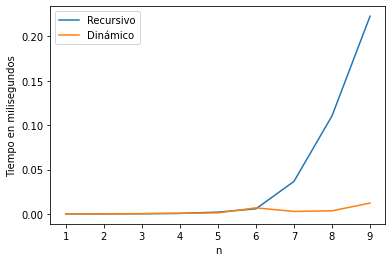

In [16]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[];
yR=[];
yD=[];

for n in range(1,10):
    expKeys, expProb, expFails = generarArbolProbs(n)
    x.append(n)
    t = repeat(setup="from __main__ import ArbolOptimoRecursivo", stmt=f"ArbolOptimoRecursivo({expKeys}, {expProb}, 0, {len(expProb)-1})", repeat=1, number=10)
    yR.append(t)
    t = repeat(setup="from __main__ import ArbolOptimoDinamico", stmt=f"ArbolOptimoDinamico({expKeys}, {expProb})", repeat=1, number=10)
    yD.append(t)

plt.plot(x,yR)
plt.plot(x,yD)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que la implementación dinámica del algoritmo **Árbol binario de búsqueda óptimo** es mucho más rápida en comparacion a la implementación recursiva.

Cabe notar que a diferencia de experimentos anteriores con otros algoritmos, aquí no existen los puntos altos en la gráfica o "ruido" que es causado normalmente debido al comportamiento impredecible de los procesadores, esto es posiblemente por lo corto que es el problema y el rango en el que se encuentra $n$, muy probablemente para rangos de $n$ mayores se empiezen a ver esos eventos.

## 4.2. Analisis Elemento con mayor probabilidad como raiz

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos si seleccionamos al elemento con mayor probabilidad de ser buscado como raiz del árbol.

In [17]:
import numpy as np
# Codigo Recursivo
def ArbolOptimoRecursivoExperimento(prob, i, j):
    if j < i:
        return 0
    if j == i:
        return prob[i]
    fsum = 0
    for k in range(i, j + 1):
        fsum += prob[k]
    Min = 99999999
    for r in range(i, j + 1):
        costIzq = ArbolOptimoRecursivoExperimento(prob, i, r - 1)
        costDer = ArbolOptimoRecursivoExperimento(prob, r + 1, j)
        Min = min(costIzq + costDer, Min)
    return Min + fsum

# Codigo Dinamico
def ArbolOptimoDinamicoExperimento(prob):
    n = len(prob)
    cost = [[0] * n for i in range(n)]
    for i in range(n):
        cost[i][i] = prob[i]
    for size in range(1, n + 1):
        for i in range(n - size + 1):
            j = min(i + size - 1, n - 1)
            cost[i][j] = 9999999999
            for r in range(i, j + 1):
                total = 0
                for k in range(i, j + 1):
                    total += prob[k]
                if r != i: total += cost[i][r - 1]
                if r != j: total += cost[r + 1][j]
                cost[i][j] = min(total, cost[i][j])
    return cost[0][n - 1]

k, p, nul = generarArbolProbs(5)

print(ArbolOptimoRecursivoExperimento(p, 0, 4))
print(ArbolOptimoDinamicoExperimento(p))

0.9649813706050208
0.9649813706050208
